In [3]:
import matplotlib
import matplotlib.pylab as plt
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D
import numpy as np

In [3]:
nib.Nifti1Header.quaternion_threshold = - np.finfo(np.float32).eps * 10
img_path = "../ADNI-Datasets/AD/test/ADNI_002_S_0619_affine.nii.gz"
img = nib.load(img_path)
print(img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 256)
affine: 
[[-9.99999940e-01  1.61558713e-27  1.38777878e-17  1.21030312e+02]
 [-1.38777878e-17  1.38777878e-17  9.99999881e-01 -1.15576630e+02]
 [-1.61558713e-27 -1.00000000e+00  0.00000000e+00  1.05991089e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_dur

256
256
256
b''
(256, 256, 256)
256 256 256


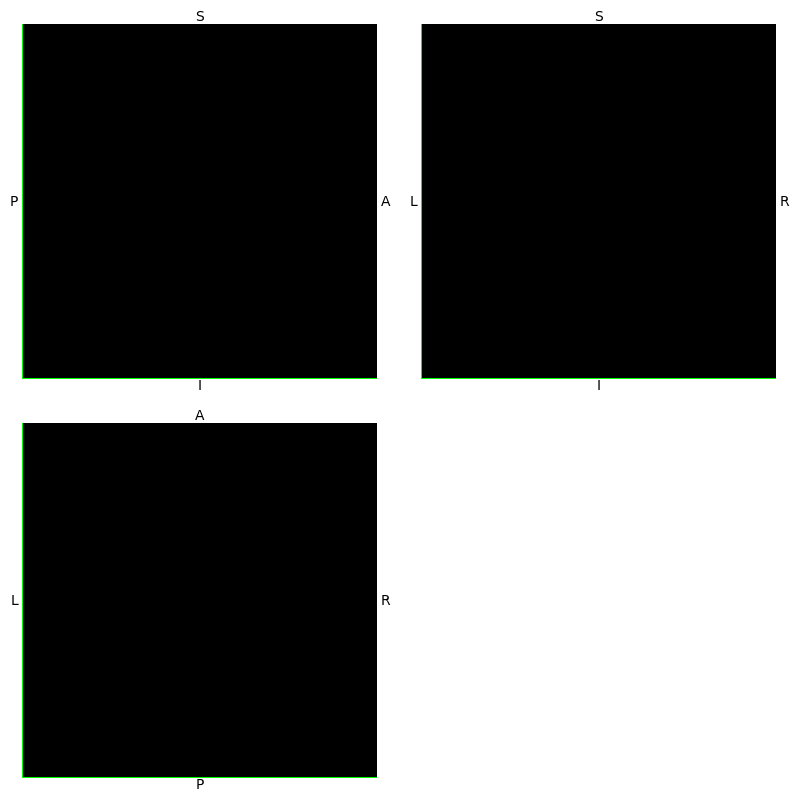

In [4]:
print(img.shape[0])
print(img.shape[1])
print(img.shape[2])

print(img.header['db_name'])  #显示header 当中db_name
print(img.dataobj.shape)
#有些可能图片是四维的
width,height,queue=img.dataobj.shape
print(width,height,queue)
OrthoSlicer3D(img.dataobj).show()


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 256)
affine: 
[[-9.99999940e-01  1.61558713e-27  1.38777878e-17  1.21030312e+02]
 [-1.38777878e-17  1.38777878e-17  9.99999881e-01 -1.15576630e+02]
 [-1.61558713e-27 -1.00000000e+00  0.00000000e+00  1.05991089e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_dur

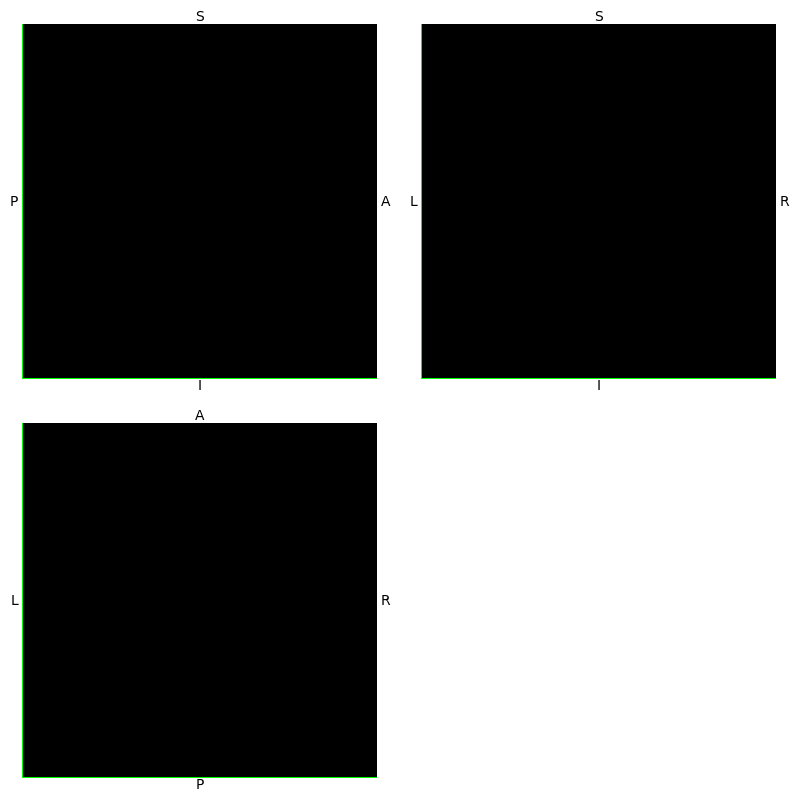

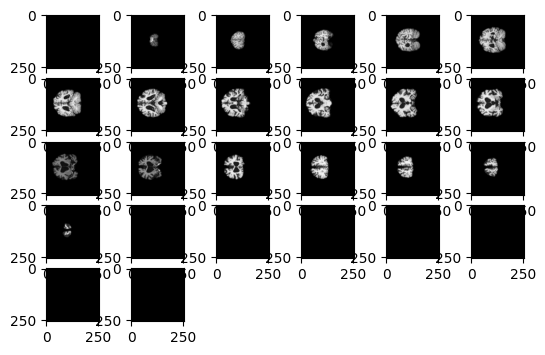

In [6]:
import matplotlib
from matplotlib import pylab as plt
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

img_path = "../ADNI-Datasets/AD/test/ADNI_002_S_0619_affine.nii.gz"
img=nib.load(img_path)
# 打印文件信息
print(img)
print(img.dataobj.shape)

#shape不一定只有三个参数，打印出来看一下
width,height,queue=img.dataobj.shape
print(width,height,queue)

#显示3D图像
OrthoSlicer3D(img.dataobj).show()

# 计算看需要多少个位置来放切片图
x = int((queue/10) ** 0.5) + 1
num = 1
# 按照10的步长，切片，显示2D图像
for i in range(0, queue, 10):
    # 此处是以queue为切片
    img_arr = img.dataobj[:, :, i]
    plt.subplot(x, x, num)
    plt.imshow(img_arr, cmap='gray')
    num += 1
plt.show()


(256, 256, 256)


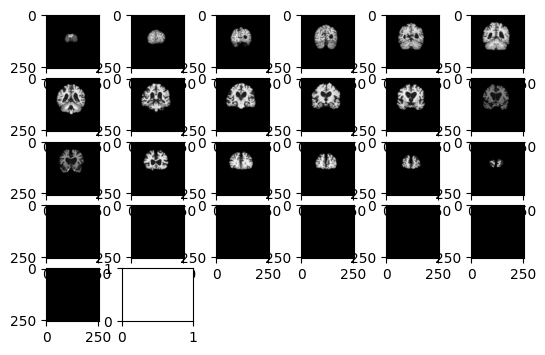

In [10]:
import SimpleITK as itk 
from matplotlib import pyplot as plt 

# SimpleITK 读取图像是以 (queue, width, height) 模式输出，不同于 nibabel
def show_nii(img):
    num=1
    x = int((img.shape[0]/10) ** 0.5) + 1
    # 按照10的步长，切片，显示2D图像
    for i in range(0,img.shape[0],10):
        # 此处是以queue为切片
        plt.imshow(img[i,:,:],cmap='gray')
        # plt.subplot(5,4,num)
        plt.subplot(x,x,num)
        num+=1

img_path = "../ADNI-Datasets/AD/test/ADNI_002_S_0619_affine.nii.gz"
itk_img=itk.ReadImage(img_path)
img=itk.GetArrayFromImage(itk_img)
print(img.shape)
show_nii(img)
plt.show()


/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


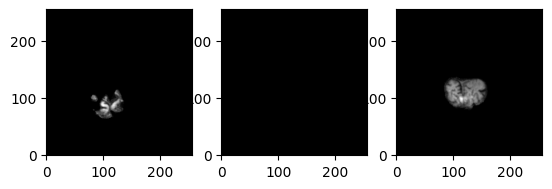

In [13]:
import nibabel as nib
import matplotlib.pyplot as plt

epi_img = nib.load("../ADNI-Datasets/AD/test/ADNI_002_S_0619_affine.nii.gz")
epi_img_data = epi_img.get_data()
epi_img_data.shape


def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")


slice_0 = epi_img_data[52, :, :]
slice_1 = epi_img_data[:, 13, :]
slice_2 = epi_img_data[:, :, 14]
show_slices([slice_0, slice_1, slice_2])
# plt.suptitle("Center slices for EPI image")
plt.show()


/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


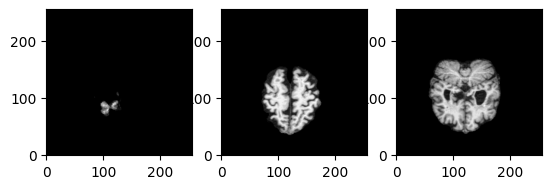

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

epi_img = nib.load("../ADNI-Datasets/AD/test/ADNI_002_S_0619_affine.nii.gz")
epi_img_data = epi_img.get_data()
epi_img_data.shape


def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")


slice_0 = epi_img_data[50, :, :]
slice_1 = epi_img_data[:, 50, :]
slice_2 = epi_img_data[:, :, 50]
show_slices([slice_0, slice_1, slice_2])
# plt.suptitle("Center slices for EPI image")
plt.show()

## NII数据切片转2D图像

In [1]:
import scipy, numpy, shutil, os, nibabel, glob
import sys, getopt
import imageio

In [81]:
# 切片
def niito2D(filepath):
    inputfiles =  glob.glob(os.path.join(filepath, "*.nii.gz"))  #遍历文件夹数据
    outputfile = '/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/All-256/slice_C/'       #输出文件夹
    print('Input file is ', inputfiles)
    print('Output folder is ', outputfile)

    for inputfile in inputfiles:
        image_array = nibabel.load(inputfile).get_data() #数据读取

        # set destination folder
        if not os.path.exists(outputfile):
            os.makedirs(outputfile)   #不存在输出文件夹则新建
            print("Created ouput directory: " + outputfile)
        print('Reading NIfTI file...')

        total_slices =  256 #总切片数
        slice_counter = 0 #从第几个切片开始

        # iterate through slices
        for current_slice in range(slice_counter, total_slices):
            # alternate slices
            if (slice_counter % 1) == 0:
                
                # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                # data = image_array[current_slice, :, :] 
                # data = image_array[:, current_slice, :] 
                data = image_array[:, :, current_slice]
               
                # alternate slices and save as png
                if (slice_counter % 1) == 0:
                    print('Saving image...')
                    #切片命名
                    image_name = inputfile[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
                    #保存
                    imageio.imwrite(image_name, data)
                    print('Saved.')

                    # move images to folder
                    print('Moving image...')
                    src = image_name
                    shutil.move(src, outputfile)
                    print('Moved.')
    print('Finished converting images')


In [82]:
# niito2D(filepath="/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/")

Input file is  ['/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/ADNI_002_S_0619_affine.nii.gz']
Output folder is  /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/All-256/slice_C/
Created ouput directory: /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/All-256/slice_C/
Reading NIfTI file...
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.

/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':


Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Saving image...
Saved.
Moving image...
Moved.
Savi

## Filter

### 矢状面进行切片（start=80, end=160 total 80）

In [148]:
# 切片 矢状面进行切片（start=80, end=160 total 80）
def niito2D_A(filepath):
    inputfiles =  glob.glob(os.path.join(filepath, "*.nii.gz"))  #遍历文件夹数据
    outputfile = '/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/Filter/slice_A/'       #输出文件夹
    # print('Input file is ', inputfiles)
    # print('Output folder is ', outputfile)

    for inputfile in inputfiles:
        image_array = nibabel.load(inputfile).get_data() #数据读取

        # set destination folder
        if not os.path.exists(outputfile):
            os.makedirs(outputfile)   #不存在输出文件夹则新建
            # print("Created ouput directory: " + outputfile)
        # print('Reading NIfTI file...')

        slice_start = 80 #从第几个切片开始
        slice_end = 160

        # iterate through slices
        for current_slice in range(slice_start, slice_end):
            # alternate slices
            # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
            data = image_array[current_slice, :, :] 
            # data = image_array[:, current_slice, :] 
            # data = image_array[:, :, current_slice]
            
            # alternate slices and save as png
               
            # print('Saving image...')
            #切片命名
            image_name = inputfile[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
            #保存
            imageio.imwrite(image_name, data)
            # print('Saved.')
            # move images to folder
            # print('Moving image...')
            src = image_name
            shutil.move(src, outputfile)
            # print('Moved.')
    print('Finished converting images')


In [149]:
# niito2D_A(filepath="/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/")

/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':


Finished converting images


### 冠状面进行切片（start=70, end=120 total 50）

In [150]:
# 切片 冠状面进行切片（start=70, end=121 total 50）
def niito2D_B(filepath):
    inputfiles =  glob.glob(os.path.join(filepath, "*.nii.gz"))  #遍历文件夹数据
    outputfile = '/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/Filter/slice_B/'       #输出文件夹
    # print('Input file is ', inputfiles)
    # print('Output folder is ', outputfile)

    for inputfile in inputfiles:
        image_array = nibabel.load(inputfile).get_data() #数据读取

        # set destination folder
        if not os.path.exists(outputfile):
            os.makedirs(outputfile)   #不存在输出文件夹则新建
            # print("Created ouput directory: " + outputfile)
        # print('Reading NIfTI file...')

        slice_start = 70 #从第几个切片开始
        slice_end = 120

        # iterate through slices
        for current_slice in range(slice_start, slice_end):
            # alternate slices
            # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
            # data = image_array[current_slice, :, :] 
            data = image_array[:, current_slice, :] 
            # data = image_array[:, :, current_slice]
            
            # alternate slices and save as png
               
            # print('Saving image...')
            #切片命名
            image_name = inputfile[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
            #保存
            imageio.imwrite(image_name, data)
            # print('Saved.')
            # move images to folder
            # print('Moving image...')
            src = image_name
            shutil.move(src, outputfile)
            # print('Moved.')
    print('Finished converting images')


In [151]:
# niito2D_B(filepath="/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/")

/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':


Finished converting images


### 横断面进行切片（start=60, end=90 total 30）

In [152]:
# 切片 横断面进行切片（start=60, end=90 total 30）
def niito2D_C(filepath):
    inputfiles =  glob.glob(os.path.join(filepath, "*.nii.gz"))  #遍历文件夹数据
    outputfile = '/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/Filter/slice_C/'       #输出文件夹
    # print('Input file is ', inputfiles)
    # print('Output folder is ', outputfile)

    for inputfile in inputfiles:
        image_array = nibabel.load(inputfile).get_data() #数据读取

        # set destination folder
        if not os.path.exists(outputfile):
            os.makedirs(outputfile)   #不存在输出文件夹则新建
            # print("Created ouput directory: " + outputfile)
        # print('Reading NIfTI file...')

        slice_start = 60 #从第几个切片开始
        slice_end = 90

        # iterate through slices
        for current_slice in range(slice_start, slice_end):
            # alternate slices
            # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
            # data = image_array[current_slice, :, :] 
            # data = image_array[:, current_slice, :] 
            data = image_array[:, :, current_slice]
            
            # alternate slices and save as png
               
            # print('Saving image...')
            #切片命名
            image_name = inputfile[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
            #保存
            imageio.imwrite(image_name, data)
            # print('Saved.')
            # move images to folder
            # print('Moving image...')
            src = image_name
            shutil.move(src, outputfile)
            # print('Moved.')
    print('Finished converting images')


In [153]:
# niito2D_C(filepath="/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/")

Finished converting images


/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':


## 开始正式生成切片   针对去颅骨校正后的


### AD组切片

In [167]:
# 切片 矢状面进行切片（start=80, end=160 total 80）
def niito2D_A_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹

    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 80 #从第几个切片开始
    slice_end = 160

    # iterate through slices
    for current_slice in range(slice_start, slice_end):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[current_slice, :, :] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)


In [168]:
# 切片 冠状面进行切片（start=70, end=120 total 50）
def niito2D_B_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹

    
    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 70 #从第几个切片开始
    slice_end = 120

    # iterate through slices
    for current_slice in range(slice_start, slice_end):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[:, current_slice, :] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)


In [169]:
# 切片 横断面进行切片（start=60, end=90 total 30）
def niito2D_C_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹
    
    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 60 #从第几个切片开始
    slice_end = 90

    # iterate through slices
    for current_slice in range(slice_start, slice_end):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[:, :, current_slice] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)


In [171]:
# AD_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/brain_affine/*.nii.gz")

# for i in AD_Brain_Affine_list:
#     niito2D_A_batch(i, "slice_A", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/")
#     niito2D_B_batch(i, "slice_B", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/")
#     niito2D_C_batch(i, "slice_C", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/")


/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


### CN组切片

In [172]:
# CN_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/brain_affine/*.nii.gz")

# for i in CN_Brain_Affine_list:
#     niito2D_A_batch(i, "slice_A", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/")
#     niito2D_B_batch(i, "slice_B", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/")
#     niito2D_C_batch(i, "slice_C", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/")
# CN_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/brain_affine/*.nii.gz")


/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


### MCI组切片

In [173]:
# MCI_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/brain_affine/*.nii.gz")

# for i in MCI_Brain_Affine_list:
#     niito2D_A_batch(i, "slice_A", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/")
#     niito2D_B_batch(i, "slice_B", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/")
#     niito2D_C_batch(i, "slice_C", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/")

/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/pugongying/anaconda3/envs/pt/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


### AD组分方向混合

In [195]:
slices_AD_A = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/*/slice_A/*.png")
target_AD_A = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_A/"

for i in slices_AD_A:
    # shutil.copy(i, target_AD_A)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_A/*.png")))

12000


In [196]:
slices_AD_B = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/*/slice_B/*.png")
target_AD_B = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_B/"

for i in slices_AD_B:
    # shutil.copy(i, target_AD_B)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_B/*.png")))

7500


In [197]:
slices_AD_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/*/slice_C/*.png")
target_AD_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/"

for i in slices_AD_C:
    # shutil.copy(i, target_AD_C)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/*.png")))

4500


### CN组分方向混合

In [198]:
slices_CN_A = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/*/slice_A/*.png")
target_CN_A = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_A/"

for i in slices_CN_A:
    # shutil.copy(i, target_CN_A)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_A/*.png")))

12000


In [199]:
slices_CN_B = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/*/slice_B/*.png")
target_CN_B = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_B/"

for i in slices_CN_B:
    # shutil.copy(i, target_CN_B)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_B/*.png")))

7500


In [201]:
slices_CN_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/*/slice_C/*.png")
target_CN_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C/"

for i in slices_CN_C:
    # shutil.copy(i, target_CN_C)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C/*.png")))

4500


### MCI组分方向混合

In [202]:
slices_MCI_A = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/*/slice_A/*.png")
target_MCI_A = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_A/"

for i in slices_MCI_A:
    # shutil.copy(i, target_MCI_A)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_A/*.png")))

12000


In [203]:
slices_MCI_B = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/*/slice_B/*.png")
target_MCI_B = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_B/"

for i in slices_MCI_B:
    # shutil.copy(i, target_MCI_B)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_B/*.png")))

7500


In [204]:
slices_MCI_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/*/slice_C/*.png")
target_MCI_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C/"

for i in slices_MCI_C:
    # shutil.copy(i, target_MCI_C)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C/*.png")))

4500


## 横截面 Axial进行方位校正，以便海马体的提取

In [3]:
import pandas as pd
import numpy as np
import os
import shutil
import cv2
import glob
import imageio

In [ ]:
# slices_AD_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/Filter/slice_C/*.png")
# target_AD_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/Filter/slices_C_Correct_Direction/"
# for i in slices_AD_C:
#     print(i)
#     img = cv2.imread(i)
#     img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    
#     img_name = i.split("/")[-1]
    
#     #切片命名
#     #保存
#     imageio.imwrite(img_name, img)
#     shutil.move(img_name, target_AD_C)
#     break

In [24]:
slices_AD_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/*.png")
target_AD_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C_Correct_Direction/"
for i in slices_AD_C:
    # img = cv2.imread(i)
    # img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    # img_name = i.split("/")[-1]
    # imageio.imwrite(img_name, img)
    # shutil.move(img_name, target_AD_C)


slices_CN_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C/*.png")
target_CN_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C_Correct_Direction/"
for i in slices_CN_C:
    # img = cv2.imread(i)
    # img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    # img_name = i.split("/")[-1]
    # imageio.imwrite(img_name, img)
    # shutil.move(img_name, target_CN_C)




slices_MCI_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C/*.png")
target_MCI_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C_Correct_Direction/"
for i in slices_MCI_C:
    # img = cv2.imread(i)
    # img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    # img_name = i.split("/")[-1]
    # imageio.imwrite(img_name, img)
    # shutil.move(img_name, target_MCI_C)



## 未去颅骨的原始图片进行横截面切割

In [1]:
import matplotlib
import matplotlib.pylab as plt
import nibabel
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D
import numpy as np
import os
import glob
import scipy, numpy, shutil, os, nibabel, glob
import sys, getopt
import imageio

In [4]:
# 切片 横断面进行切片（start=60, end=90 total 30）
def niito2D_C_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹
    
    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 100 #从第几个切片开始
    slice_end = 130

    # iterate through slices
    for current_slice in range(slice_start, slice_end):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[current_slice, :, :] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)


In [5]:


AD_Brain_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/ADNI_002_S_0619_I120964.nii")

for i in AD_Brain_list:
    niito2D_C_batch(i, "slice_C", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/test/origin_slices_C")


/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
Lossy conversion from >f4 to uint8. Range [0.0, 2780.9296875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 2891.03466796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 2931.153564453125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 2708.243408203125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from >f4 to uint8. Range [0.0, 2830.433349609

In [1]:
import glob



print("All AD Images: " + str(len(glob.glob("../ADNI-Datasets/AD/All/*.png"))))
print("All CN Images: " + str(len(glob.glob("../ADNI-Datasets/CN/All/*.png"))))
print("All MCI Images: " + str(len(glob.glob("../ADNI-Datasets/MCI/All/*.png"))))

All AD Images: 15000
All CN Images: 15000
All MCI Images: 15000


# 正式生成切片（针对去颅骨校正后的）
* 矢状面16 冠状面16 横截面32   
* 64*150=9600

In [46]:
# 16 16 32 
64*150

9600

In [2]:
import scipy, numpy, shutil, os, nibabel, glob, math
import sys, getopt
import imageio, cv2, numpy as np

### AD组切片

In [90]:
# 切片 矢状面进行切片
def niito2D_A_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹

    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 80 #从第几个切片开始
    slice_end = 112

    # iterate through slices
    for current_slice in range(slice_start, slice_end, 2):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[current_slice, :, :] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + "_sliceA.png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)

        
# 切片 冠状面进行切片（start=70, end=120 total 16）
def niito2D_B_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹

    
    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 80 #从第几个切片开始
    slice_end = 112

    # iterate through slices
    for current_slice in range(slice_start, slice_end, 2):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[:, current_slice, :] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + "_sliceB.png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)

        

# 切片 横断面进行切片（start=60, end=90 total 16）
def niito2D_C_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹
    
    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 40 #从第几个切片开始
    slice_end = 104

    # iterate through slices
    for current_slice in range(slice_start, slice_end, 2):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[:, :, current_slice] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + "_sliceC.png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)


### AD组切片

In [91]:
AD_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/brain_affine/*.nii.gz")

for i in AD_Brain_Affine_list:
    niito2D_A_batch(i, "slice_A", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/")
    niito2D_B_batch(i, "slice_B", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/")
    niito2D_C_batch(i, "slice_C", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/")


/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:67: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictabl

### CN组切片

In [99]:
CN_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/brain_affine/*.nii.gz")

for i in CN_Brain_Affine_list:
    niito2D_A_batch(i, "slice_A", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/")
    niito2D_B_batch(i, "slice_B", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/")
    niito2D_C_batch(i, "slice_C", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/")


/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:67: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictabl

### MCI组切片

In [100]:
MCI_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/brain_affine/*.nii.gz")

for i in MCI_Brain_Affine_list:
    niito2D_A_batch(i, "slice_A", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/")
    niito2D_B_batch(i, "slice_B", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/")
    niito2D_C_batch(i, "slice_C", "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/")

/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:67: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictabl

In [52]:
### 每个人根据图片信息熵筛选前16个图片进行混合
# def img_info(img_path):
#     tmp = []
#     for i in range(256):
#         tmp.append(0)
#     val = 0
#     k = 0
#     res = 0
#     image = cv2.imread(img_path,0)
#     img = np.array(image)
#     for i in range(len(img)):
#         for j in range(len(img[i])):
#             val = img[i][j]
#             tmp[val] = float(tmp[val] + 1)
#             k =  float(k + 1)
#     for i in range(len(tmp)):
#         tmp[i] = float(tmp[i] / k)
#     for i in range(len(tmp)):
#         if(tmp[i] == 0):
#             res = res
#         else:
#             res = float(res - tmp[i] * (math.log(tmp[i]) / math.log(2.0)))
    
#     return res



### AD组方向混合

In [92]:
slices_AD_A = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/*/slice_A/*.png")
target_AD_A = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_A/"


for i in slices_AD_A:
    # shutil.copy(i, target_AD_A)
    
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_A/*.png")))


slices_AD_B = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/*/slice_B/*.png")
target_AD_B = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_B/"

for i in slices_AD_B:
    # shutil.copy(i, target_AD_B)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_B/*.png")))


slices_AD_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices/*/slice_C/*.png")
target_AD_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/"

for i in slices_AD_C:
    # shutil.copy(i, target_AD_C)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/*.png")))

2400
2400
4800


### CN组方向混合

In [101]:
slices_CN_A = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/*/slice_A/*.png")
target_CN_A = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_A/"

for i in slices_CN_A:
    # shutil.copy(i, target_CN_A)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_A/*.png")))


slices_CN_B = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/*/slice_B/*.png")
target_CN_B = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_B/"

for i in slices_CN_B:
    # shutil.copy(i, target_CN_B)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_B/*.png")))



slices_CN_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices/*/slice_C/*.png")
target_CN_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C/"

for i in slices_CN_C:
    # shutil.copy(i, target_CN_C)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C/*.png")))

2400
2400
4800


### MCI组方向混合

In [102]:
slices_MCI_A = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/*/slice_A/*.png")
target_MCI_A = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_A/"

for i in slices_MCI_A:
    # shutil.copy(i, target_MCI_A)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_A/*.png")))



slices_MCI_B = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/*/slice_B/*.png")
target_MCI_B = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_B/"

for i in slices_MCI_B:
    # shutil.copy(i, target_MCI_B)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_B/*.png")))


slices_MCI_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices/*/slice_C/*.png")
target_MCI_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C/"

for i in slices_MCI_C:
    # shutil.copy(i, target_MCI_C)

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C/*.png")))

2400
2400
4800


In [103]:

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_A/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_B/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C_Correct_Direction/*.png")))
print()

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_A/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_B/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C_Correct_Direction/*.png")))
print()

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_A/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_B/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C_Correct_Direction/*.png")))

2400
2400
4800
4800

2400
2400
4800
0

2400
2400
4800
0


In [5]:
### 横截面方向校正 slice_c

In [3]:
import pandas as pd
import numpy as np
import os
import shutil
import cv2
import glob
import imageio

In [104]:
# slices_AD_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/*.png")
# target_AD_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C_Correct_Direction/"
# for i in slices_AD_C:
#     img = cv2.imread(i)
#     img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#     img_name = i.split("/")[-1]
#     imageio.imwrite(img_name, img)
#     shutil.move(img_name, target_AD_C)


slices_CN_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C/*.png")
target_CN_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/slices_C_Correct_Direction/"
for i in slices_CN_C:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.move(img_name, target_CN_C)




slices_MCI_C = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C/*.png")
target_MCI_C = "/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/slices_C_Correct_Direction/"
for i in slices_MCI_C:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.move(img_name, target_MCI_C)



In [94]:
pwd

'/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets-Process'

In [79]:
#### 命令行 
# cp -r  /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_A/*.png /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/All

# cp -r  /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_B/*.png /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/All

# cp -r  /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/slices_C/*.png /home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/All


In [111]:

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/AD/All/*.png")))

print()

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/CN/All/*.png")))

print()


print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/ADNI-Datasets/MCI/All/*.png")))

9600

9600

9600


### 横断面进行切片-Affine

* 从ADNI-Datasets将brain_affine迁移到New-Data-Brain-Affine中，
* 挑选横截面数据，利用图像熵算法进行提取32张图片/人
* 32 * 150 = 4800
* 4800 * 3 = 14400

In [20]:
import pandas as pd
import numpy as np
import os
import shutil
import cv2
import glob
import imageio

import matplotlib
import matplotlib.pylab as plt
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

In [4]:
def niito2D_Axial_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹

    
    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 0 #从第几个切片开始
    slice_end = 256

    # iterate through slices
    for current_slice in range(slice_start, slice_end):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[:, current_slice, :] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)

In [5]:
AD_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/brain_affine/*.nii.gz")

for i in AD_Brain_Affine_list:
    niito2D_Axial_batch(i, "slice_axial", "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/slices/")


/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys


In [6]:
CN_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/brain_affine/*.nii.gz")

for i in CN_Brain_Affine_list:
    niito2D_Axial_batch(i, "slice_axial", "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/slices/")


/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys


In [7]:
MCI_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/brain_affine/*.nii.gz")

for i in MCI_Brain_Affine_list:
    niito2D_Axial_batch(i, "slice_axial", "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/slices/")

/home/pugongying/anaconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys


In [8]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/brain_affine/*")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/brain_affine/*")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/brain_affine/*")))

150
150
150


In [7]:

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/slices/*/slice_axial/*.png")))

print()

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/slices/*/slice_axial/*.png")))

print()


print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/slices/*/slice_axial/*.png")))

38400

38400

38400


### 利用图片熵进行筛选，32/人
Image_info_entropy

In [124]:
# ADList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data/AD/slices/*")
# for i in ADList:
#     os.mkdir(os.path.join(i, "Top32"))

In [10]:
# '../New-Data/AD/slices/ADNI_002_S_0619/slice_axial/ADNI_002_S_0619_001.png'


import cv2
import numpy as np
import math

def compute_img_info(img_path):
    tmp = []
    for i in range(256):
        tmp.append(0)
    val = 0
    k = 0
    res = 0
    image = cv2.imread(img_path,0)
    img = np.array(image)
    for i in range(len(img)):
        for j in range(len(img[i])):
            val = img[i][j]
            tmp[val] = float(tmp[val] + 1)
            k =  float(k + 1)
    for i in range(len(tmp)):
        tmp[i] = float(tmp[i] / k)
    for i in range(len(tmp)):
        if(tmp[i] == 0):
            res = res
        else:
            res = float(res - tmp[i] * (math.log(tmp[i]) / math.log(2.0)))
    return res


In [11]:
compute_img_info("../New-Data-brain-affine/AD/slices/ADNI_002_S_0619/slice_axial/ADNI_002_S_0619_120.png")

2.927719470076922

In [12]:
ADList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/slices/*")
for i in ADList:
    os.mkdir(os.path.join(i, "Top32"))

In [21]:
ADList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/slices/*")
ADDict = {}

for img_parent in ADList:
    for img in glob.glob(os.path.join(img_parent, "slice_axial/*.png")):
        img_score = compute_img_info(img)
        ADDict.update({img:img_score})
    d_order = sorted(ADDict.items(),key=lambda x:x[1], reverse=True)
    d_dict = dict(d_order[:32])
    for key in d_dict.keys():
        shutil.copy(key, os.path.join(img_parent, "Top32/"))
    ADDict = {}


In [23]:
CNList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/slices/*")
for i in CNList:
    os.mkdir(os.path.join(i, "Top32"))

In [24]:
CNList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/slices/*")
CNDict = {}

for img_parent in CNList:
    for img in glob.glob(os.path.join(img_parent, "slice_axial/*.png")):
        img_score = compute_img_info(img)
        CNDict.update({img:img_score})
    d_order = sorted(CNDict.items(),key=lambda x:x[1], reverse=True)
    d_dict = dict(d_order[:32])
    for key in d_dict.keys():
        shutil.copy(key, os.path.join(img_parent, "Top32"))
    CNDict = {}

In [26]:
MCIList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/slices/*")
for i in MCIList:
    os.mkdir(os.path.join(i, "Top32"))

In [27]:
MCIList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/slices/*")
MCIDict = {}

for img_parent in MCIList:
    for img in glob.glob(os.path.join(img_parent, "slice_axial/*.png")):
        img_score = compute_img_info(img)
        MCIDict.update({img:img_score})
    d_order = sorted(MCIDict.items(),key=lambda x:x[1], reverse=True)
    d_dict = dict(d_order[:32])
    for key in d_dict.keys():
        shutil.copy(key, os.path.join(img_parent, "Top32"))
    MCIDict = {}

In [7]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/slices/*/Top32/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/slices/*/Top32/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/slices/*/Top32/*.png")))

4800
4800
4800


### 融合到 New-Data/AD/All
* 32*150 = 4800

In [29]:
ad_slice_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/slices/*/Top32/*.png")
ad_target= "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/All/"

for i in ad_slice_source:
    shutil.copy(i, ad_target)

In [32]:
cn_slice_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/slices/*/Top32/*.png")
cn_target= "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/All/"

for i in cn_slice_source:
    shutil.copy(i, cn_target)

In [33]:
mci_slice_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/slices/*/Top32/*.png")
mci_target= "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/All/"

for i in mci_slice_source:
    shutil.copy(i, mci_target)

In [8]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/All/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/All/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/All/*.png")))

4800
4800
4800


### Axial方向矫正

In [2]:
ad_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/All/*.png")
ad_target = "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/All-Correct"
for i in ad_source:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.copy(img_name, ad_target)

NameError: name 'cv2' is not defined

In [37]:
cn_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/All/*.png")
cn_target = "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/All-Correct"
for i in cn_source:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.copy(img_name, cn_target)

In [39]:
mci_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/All/*.png")
mci_target = "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/All-Correct"
for i in mci_source:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.copy(img_name, mci_target)

In [9]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/AD/All-Correct/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/CN/All-Correct/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-affine/MCI/All-Correct/*.png")))

4800
4800
4800


### 横断面进行切片-Mask

* 从ADNI-Datasets将brain_mask迁移到New-Data-Brain-Mask中，
* 挑选横截面数据，利用图像熵算法进行提取32张图片/人
* 32 * 150 = 4800
* 4800 * 3 = 14400

In [4]:
import pandas as pd
import numpy as np
import os
import shutil
import cv2
import glob
import imageio

import matplotlib
import matplotlib.pylab as plt
import nibabel
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

In [6]:
def niito2D_Axial_batch(nii_file, slice_dim, parent_folder):
    
    outputfile = os.path.join(nii_file.split("/")[-1][: 15], slice_dim)
    outputfile = os.path.join(parent_folder, outputfile)       #输出文件夹

    
    image_array = nibabel.load(nii_file).get_data() #数据读取

    # set destination folder
    if not os.path.exists(outputfile):
        os.makedirs(outputfile)   #不存在输出文件夹则新建

    slice_start = 0 #从第几个切片开始
    slice_end = 256

    # iterate through slices
    for current_slice in range(slice_start, slice_end):
        # alternate slices
        # [A,B,C]: A 矢状面 B 冠状面 C 横断面
                
        data = image_array[:, current_slice, :] 
        #切片命名
        image_name = nii_file[:-13] + "{:0>3}".format(str(current_slice + 1)) + ".png"
        #保存
        imageio.imwrite(image_name, data)
        src = image_name
        shutil.move(src, outputfile)

In [7]:
AD_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/brain_mask/*.nii.gz")

for i in AD_Brain_Affine_list:
    niito2D_Axial_batch(i, "slice_axial", "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/slices/")


In [8]:
CN_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/brain_mask/*.nii.gz")

for i in CN_Brain_Affine_list:
    niito2D_Axial_batch(i, "slice_axial", "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/slices/")


In [9]:
MCI_Brain_Affine_list = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/brain_mask/*.nii.gz")

for i in MCI_Brain_Affine_list:
    niito2D_Axial_batch(i, "slice_axial", "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/slices/")

In [10]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/brain_mask/*")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/brain_mask/*")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/brain_mask/*")))

150
150
150


In [11]:

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/slices/*/slice_axial/*.png")))

print()

print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/slices/*/slice_axial/*.png")))

print()


print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/slices/*/slice_axial/*.png")))

38400

38400

38400


### 利用图片熵进行筛选，32/人

In [12]:
import cv2
import numpy as np
import math

def compute_img_info(img_path):
    tmp = []
    for i in range(256):
        tmp.append(0)
    val = 0
    k = 0
    res = 0
    image = cv2.imread(img_path,0)
    img = np.array(image)
    for i in range(len(img)):
        for j in range(len(img[i])):
            val = img[i][j]
            tmp[val] = float(tmp[val] + 1)
            k =  float(k + 1)
    for i in range(len(tmp)):
        tmp[i] = float(tmp[i] / k)
    for i in range(len(tmp)):
        if(tmp[i] == 0):
            res = res
        else:
            res = float(res - tmp[i] * (math.log(tmp[i]) / math.log(2.0)))
    return res


In [13]:
ADList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/slices/*")
for i in ADList:
    os.mkdir(os.path.join(i, "Top32"))

In [14]:
ADList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/slices/*")
ADDict = {}

for img_parent in ADList:
    for img in glob.glob(os.path.join(img_parent, "slice_axial/*.png")):
        img_score = compute_img_info(img)
        ADDict.update({img:img_score})
    d_order = sorted(ADDict.items(),key=lambda x:x[1], reverse=True)
    d_dict = dict(d_order[:32])
    for key in d_dict.keys():
        shutil.copy(key, os.path.join(img_parent, "Top32/"))
    ADDict = {}


In [15]:
CNList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/slices/*")
for i in CNList:
    os.mkdir(os.path.join(i, "Top32"))

In [16]:
CNList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/slices/*")
CNDict = {}

for img_parent in CNList:
    for img in glob.glob(os.path.join(img_parent, "slice_axial/*.png")):
        img_score = compute_img_info(img)
        CNDict.update({img:img_score})
    d_order = sorted(CNDict.items(),key=lambda x:x[1], reverse=True)
    d_dict = dict(d_order[:32])
    for key in d_dict.keys():
        shutil.copy(key, os.path.join(img_parent, "Top32"))
    CNDict = {}

In [17]:
MCIList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/slices/*")
for i in MCIList:
    os.mkdir(os.path.join(i, "Top32"))

In [18]:
MCIList = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/slices/*")
MCIDict = {}

for img_parent in MCIList:
    for img in glob.glob(os.path.join(img_parent, "slice_axial/*.png")):
        img_score = compute_img_info(img)
        MCIDict.update({img:img_score})
    d_order = sorted(MCIDict.items(),key=lambda x:x[1], reverse=True)
    d_dict = dict(d_order[:32])
    for key in d_dict.keys():
        shutil.copy(key, os.path.join(img_parent, "Top32"))
    MCIDict = {}

In [19]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/slices/*/Top32/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/slices/*/Top32/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/slices/*/Top32/*.png")))

4800
4800
4800


### 融合到 New-Data/AD/All
* 32*150 = 4800

In [20]:
ad_slice_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/slices/*/Top32/*.png")
ad_target= "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/All/"

for i in ad_slice_source:
    shutil.copy(i, ad_target)

In [21]:
cn_slice_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/slices/*/Top32/*.png")
cn_target= "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/All/"

for i in cn_slice_source:
    shutil.copy(i, cn_target)

In [22]:
mci_slice_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/slices/*/Top32/*.png")
mci_target= "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/All/"

for i in mci_slice_source:
    shutil.copy(i, mci_target)

In [23]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/All/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/All/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/All/*.png")))

4800
4800
4800


### Axial方向矫正

In [24]:
ad_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/All/*.png")
ad_target = "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/All-Correct"
for i in ad_source:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.copy(img_name, ad_target)

In [25]:
cn_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/All/*.png")
cn_target = "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/All-Correct"
for i in cn_source:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.copy(img_name, cn_target)

In [26]:
mci_source = glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/All/*.png")
mci_target = "/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/All-Correct"
for i in mci_source:
    img = cv2.imread(i)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_name = i.split("/")[-1]
    imageio.imwrite(img_name, img)
    shutil.copy(img_name, mci_target)

In [27]:
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/AD/All-Correct/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/CN/All-Correct/*.png")))
print(len(glob.glob("/home/pugongying/data/jupyterLab/shr/AD/New-Data-brain-mask/MCI/All-Correct/*.png")))

4800
4800
4800
